# Modelo de Adquisición de Datos de Redes Sociales

## Obtención de Comentarios de  Facebook Post

### Instalacion de Libreria para manipulacion de Facebook Developer

In [1]:
!pip install facebook-sdk

     -------------------------------------- 62.8/62.8 kB 482.6 kB/s eta 0:00:00
  Using cached idna-3.3-py3-none-any.whl (61 kB)
     -------------------------------------- 139.2/139.2 kB 1.2 MB/s eta 0:00:00


In [17]:
!pip install pandas

  Using cached pandas-1.3.5-cp37-cp37m-win_amd64.whl (10.0 MB)
  Using cached numpy-1.21.6-cp37-cp37m-win_amd64.whl (14.0 MB)
  Using cached pytz-2022.1-py2.py3-none-any.whl (503 kB)


### Importacion de Librerias 

In [2]:
import facebook as fb

### Requsitos previos

- Tener una pagina publica dentro de Facebook
- Crear una cuenta dentro de Facebook Developers
- Crear una apliacion para testear nuestros post 

Link: https://developers.facebook.com/

### Obtener Access Token de Facebook

- Una vez creada nuestra app entonces vamos a crear un token para manipular nuestra cuenta

#### 1. Crear una App

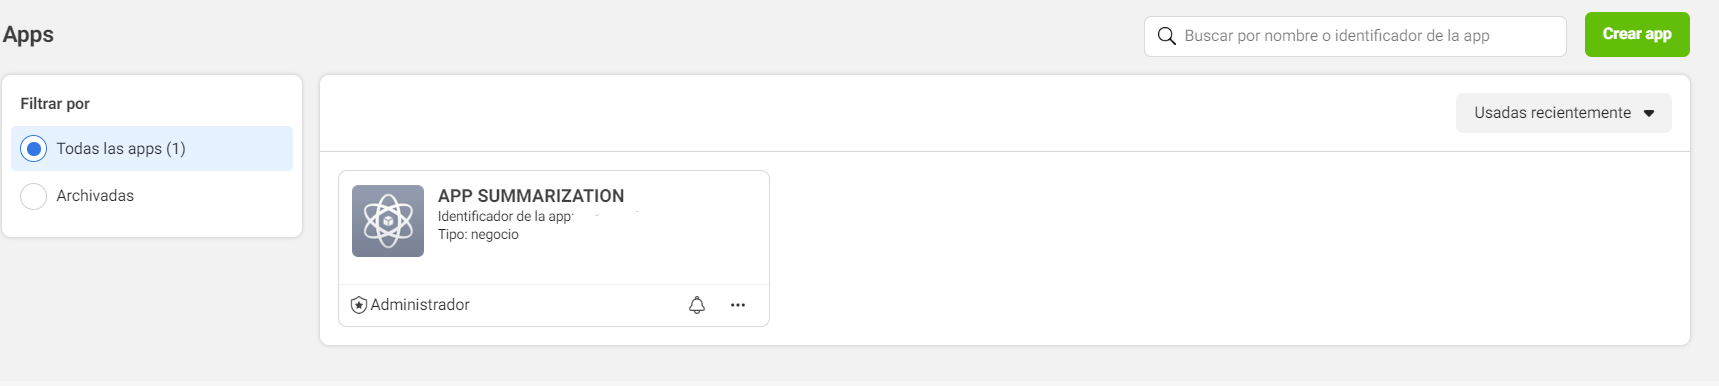



#### 2. Generar ID Token para nuestro pagina web 

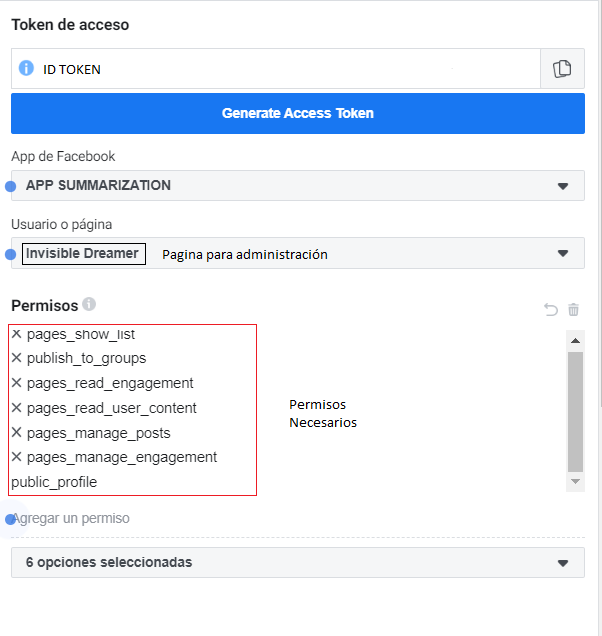

#### 3. Obtencion de nuestros ID's

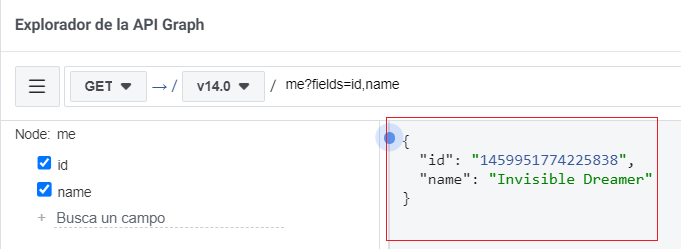

### Consultas que se pueden hacer mediante la API de Facebook

In [22]:
##Coloque aqui su token de acceso generado
access_token = "Ingresar tu token generado"

In [3]:
#API Graph le permite leer y escribir datos hacia y desde el gráfico social de Facebook
##Creando Instancia para manipulacion
pageFB = fb.GraphAPI(access_token)

In [ ]:
# Crando un post dentro de la pagina de facebook
publicacionID = pageFB.put_object("me","feed",message = "Creando un post Automatico con GraphAPI")
print(publicacionID)

In [6]:
# Obtener el contenido de una publicación, en este caso si queremos analizar nuestro publicacion anterior 
## Generamos un identificador de publicacion copiamos ese identificador y analizamos su contenido 
contenidoPost = pageFB.get_object("1583711075183240")
print(contenidoPost)

{'created_time': '2014-12-05T00:25:00+0000', 'id': '1583711075183240'}


In [ ]:
# Subir una imagen a facebook con descripcion
idPhoto = pageFB.put_photo(open("URL-IMAGEN.jpg","rb"), message = "Post Automatico")
print(idPhoto)

In [14]:
# Comentar post que recien acabamos de crear
idPhotoWithComment = pageFB.put_object("1583711075183240","comments",message = "Prueba de comentario dentro de Post2")
print(idPhotoWithComment)

{'id': '1583711075183240_609881243733978'}


### Algunas solicitudes de API Facebook donde se obtienen datos:

Obtenga el número de fans de la página:

- https://graph.facebook.com/PageID?fields=fan_count&access_token=?

Obtenga comentarios, me gusta, resumen para una publicación específica:

- https://graph.facebook.com/v14.0/1583711075183240/comments?access_token=?

Obtener para todas las publicaciones:

- https://graph.facebook.com/PageID/feed?fields=comments.limit(1).summary(true),likes.limit(1).summary(true)&access_token=?

### Obteniendo 25 ultimos publicaciones de nuestra pagina 

In [12]:
# Print the response
import requests
import pandas as pd

url = "https://graph.facebook.com/v14.0/1459951774225838/published_posts?access_token="+str(access_token)
output = requests.get(url).json()

postFeed =[]
print('Cantidad de Post Obtenidos: ',len( output['data']))
for post in  output['data']:
    try:
        postFacebook = [post["created_time"],  post["id"]]
        postFeed.append(postFacebook)
    except Exception:
        pass

#print(postFeed)
df = pd.DataFrame(postFeed, columns =['fechaCreacion', 'id_pagina_post'])
df.head(25)

Cantidad de Post Obtenidos:  25


,fechaCreacion,id_pagina_post
0,2020-03-21T18:43:23+0000,1459951774225838_2529636623924009
1,2015-05-20T01:24:22+0000,1459951774225838_1648220332065647
2,2015-03-29T02:17:00+0000,1459951774225838_1629517510602596
3,2015-03-29T01:58:58+0000,1459951774225838_1629515020602845
4,2015-03-28T23:04:23+0000,1459951774225838_1629481717272842
5,2015-02-06T23:20:53+0000,1459951774225838_1608632506024430
6,2015-02-06T23:20:06+0000,1459951774225838_1608632306024450
7,2015-02-01T23:15:41+0000,1459951774225838_1606725729548441
8,2014-12-23T02:23:29+0000,1459951774225838_1590407607846920
9,2014-12-23T02:21:59+0000,1459951774225838_1590407344513613


In [23]:
# Print the response
import requests
import pandas as pd

url = "https://graph.facebook.com/v14.0/1459951774225838/published_posts?access_token="+str(access_token)
output = requests.get(url).json()

postFeed =[]
print('Cantidad de Post Obtenidos: ',len( output['data']))
for post in  output['data']:
    try:
        postFacebook = [post["created_time"],  post["id"]]
        postFeed.append(postFacebook)
    except Exception:
        pass

#print(postFeed)
df = pd.DataFrame(postFeed, columns =['fechaCreacion', 'id_pagina_post'])
df.head(15)

Cantidad de Post Obtenidos:  25


,fechaCreacion,id_pagina_post
0,2020-03-21T18:43:23+0000,1459951774225838_2529636623924009
1,2015-05-20T01:24:22+0000,1459951774225838_1648220332065647
2,2015-03-29T02:17:00+0000,1459951774225838_1629517510602596
3,2015-03-29T01:58:58+0000,1459951774225838_1629515020602845
4,2015-03-28T23:04:23+0000,1459951774225838_1629481717272842
5,2015-02-06T23:20:53+0000,1459951774225838_1608632506024430
6,2015-02-06T23:20:06+0000,1459951774225838_1608632306024450
7,2015-02-01T23:15:41+0000,1459951774225838_1606725729548441
8,2014-12-23T02:23:29+0000,1459951774225838_1590407607846920
9,2014-12-23T02:21:59+0000,1459951774225838_1590407344513613


### Leyendo Comentarios por Id de Publicacion

In [15]:
# Print the response
import requests
import pandas as pd
##Modificar parametros de PageID_ObjID:id de la pagina mas id de la publicacion
##Modificar token asginado

url = "https://graph.facebook.com/v14.0/1459951774225838_1583711135183234/comments?access_token="+str(access_token)
output = requests.get(url).json()

print('Cantidad de Comentarios por Post Obtenidos: ',len( output['data']))
comment_data =[]
for comment in  output['data']:
        try:
            current_comment = [comment["message"], comment["from"]["name"],  comment["from"]["id"], comment["created_time"], comment["id"]]
            comment_data.append(current_comment)
        except Exception:
            current_comment = [comment["message"], 'Facebook Profile Private', 'ID Facebook Private', comment["created_time"], comment["id"]]
            comment_data.append(current_comment)  

df = pd.DataFrame(comment_data, columns =['comentario_completo', 'Profile Name', 'Id Facebook', 'fecha_comentario', 'id_pagina_post'])
df.head(10)

Cantidad de Comentarios por Post Obtenidos:  4


,comentario_completo,Profile Name,Id Facebook,fecha_comentario,id_pagina_post
0,Prueba de comentario dentro de Post2,Invisible Dreamer,1459951774225838,2022-07-14T04:29:50+0000,1583711075183240_609881243733978
1,Prueba de comentario dentro de Post,Invisible Dreamer,1459951774225838,2022-07-12T05:52:43+0000,1583711075183240_448849416783580
2,Prueba comenarios desde Juan,Juan Carlos,1497706633622182,2022-07-12T06:13:28+0000,1583711075183240_729145815012719
3,Prueba comentario,Facebook Profile Private,ID Facebook Private,2022-07-12T06:14:07+0000,1583711075183240_560806819098622


In [24]:
# Print the response
import requests
import pandas as pd
##Modificar parametros de PageID_ObjID:id de la pagina mas id de la publicacion
##Modificar token asginado

url = "https://graph.facebook.com/v14.0/1459951774225838_1583711135183234/comments?access_token="+str(access_token)
output = requests.get(url).json()

print('Cantidad de Comentarios por Post Obtenidos: ',len( output['data']))
comment_data =[]
for comment in  output['data']:
        try:
            current_comment = [comment["message"], comment["from"]["name"],  comment["from"]["id"], comment["created_time"], comment["id"]]
            comment_data.append(current_comment)
        except Exception:
            current_comment = [comment["message"], 'Facebook Profile Private', 'ID Facebook Private', comment["created_time"], comment["id"]]
            comment_data.append(current_comment)  

df = pd.DataFrame(comment_data, columns =['comentario_completo', 'Profile Name', 'Id Facebook', 'fecha_comentario', 'id_pagina_post'])
df.head(10)

Cantidad de Comentarios por Post Obtenidos:  4


,comentario_completo,Profile Name,Id Facebook,fecha_comentario,id_pagina_post
0,Prueba de comentario dentro de Post2,Invisible Dreamer,1459951774225838,2022-07-14T04:29:50+0000,1583711075183240_609881243733978
1,Prueba de comentario dentro de Post,Invisible Dreamer,1459951774225838,2022-07-12T05:52:43+0000,1583711075183240_448849416783580
2,Prueba comenarios desde Juan,Juan Carlos,1497706633622182,2022-07-14T16:55:50+0000,1583711075183240_729145815012719
3,Prueba comentario,Facebook Profile Private,ID Facebook Private,2022-07-12T06:14:07+0000,1583711075183240_560806819098622


In [53]:
df.to_csv('Datasets/datasetPostFacebook.csv', sep=';', index=False)

## Modelo para obtener comentarios de ultimos 25 publicaciones de Facebook

In [25]:
import requests
import pandas as pd

def obtencionComentariosPublicacionPaginaFacebook(token, idPagina_idPost):
    url = "https://graph.facebook.com/v14.0/"+str(idPagina_idPost)+"/comments?access_token="+str(access_token)
    output = requests.get(url).json()
    comment_data =[]
    for comment in  output['data']:
            try:
                current_comment = [comment["message"], comment["from"]["name"],  comment["from"]["id"], comment["created_time"], comment["id"]]
                comment_data.append(current_comment)
            except Exception:
                current_comment = [comment["message"], 'Facebook Profile Private', 'ID Facebook Private', comment["created_time"], comment["id"]]
                comment_data.append(current_comment)  
    return comment_data 

def obtencionUltimosPublicacionesPaginaFacebook(token, idPagina):
    url = "https://graph.facebook.com/v14.0/"+str(idPagina)+"/published_posts?access_token="+str(access_token)
    output = requests.get(url).json()
    postFeed =[]
    for post in  output['data']:
        try:
            postFacebook = [post["created_time"],  post["id"]]
            postFeed.append(postFacebook)
        except Exception:
            pass
    df = pd.DataFrame(postFeed, columns =['fechaCreacion', 'id_pagina_post'])
    df.head(10)
    return df


def obtencionIdPaginaFacebook(token):
    url = "https://graph.facebook.com/v14.0/me?fields=id%2Cname&access_token="+str(access_token)
    output = requests.get(url).json()
    return output['id']

def almacenarComentariosCSV(df):
    df.to_csv('Datasets/datasetPostFacebook.csv', sep=';', index=False)
    
def obtencionComentariosFacebook(token):
    idPage = obtencionIdPaginaFacebook(token)
    dfPublicaciones = obtencionUltimosPublicacionesPaginaFacebook(token, idPage)
    df = pd.DataFrame()
    for i in dfPublicaciones.index:
        listaComentariosPost = obtencionComentariosPublicacionPaginaFacebook(token, dfPublicaciones['id_pagina_post'][i])
        dfPost = pd.DataFrame(listaComentariosPost, columns =['comentario_completo', 'Profile Name', 'Id Facebook', 'fecha_comentario', 'id_pagina_post'])
        df = pd.concat([df, dfPost])
    df.reset_index(drop=True, inplace=True)
    almacenarComentariosCSV(df)
    return df

In [26]:
access_token = "Ingresar Token de facebook aqui"
df = obtencionComentariosFacebook(access_token)
df.head(25)

,comentario_completo,Profile Name,Id Facebook,fecha_comentario,id_pagina_post
0,Prueba commentarios con facebook,Juan Carlos,1497706633622182,2022-07-14T15:43:26+0000,1648220332065647_367833908816268
1,Prueba de comentario dentro de Post2,Invisible Dreamer,1459951774225838,2022-07-14T04:29:50+0000,1583711075183240_609881243733978
2,Prueba de comentario dentro de Post,Invisible Dreamer,1459951774225838,2022-07-12T05:52:43+0000,1583711075183240_448849416783580
3,Prueba comenarios desde Juan,Juan Carlos,1497706633622182,2022-07-12T06:13:28+0000,1583711075183240_729145815012719
4,Prueba comentario,Facebook Profile Private,ID Facebook Private,2022-07-12T06:14:07+0000,1583711075183240_560806819098622


#### Nota: Generar un nuevo token para cada vez que expira nuestro token de acceso 

## Almacenando Comenatarios dentro de Firebase


Para este paso usamos nuestro backend en django en donde enviamos los parametros de comentario, correo, tipo comentario; la ruta que se usa es de caracter localhost, modificar por url de nuestro servidor. El tipo de comentario sera obtenido desde una API externa. 

### Cargando Comentarios Facebook a Firebase

In [19]:
import requests
import json
import time 
def obtenerTipoComentario(comentario, tokenApi):
    url = "https://multilingual-sentiment-analysis2.p.rapidapi.com/sentiment/multilingual/1.0/classify"
    headers = {
            'content-type': 'application/json',
            'X-RapidAPI-Key': str(tokenApi),
            'X-RapidAPI-Host': 'multilingual-sentiment-analysis2.p.rapidapi.com',
          }
    data= {'text': comentario}
    output = requests.post(url, data=json.dumps(data), headers=headers).json()
    return output['label']

def guardarComentarioFirebase(comentario,tokenApi, correo):
    tipoComentario = obtenerTipoComentario(comentario, tokenApi)
    url = "http://192.168.100.184:8080/api/guardarComentario"
    headers = {'Content-type': 'application/json'}
    data = {"contenido_comentario":comentario,
            "tipoComentario":tipoComentario,
            "correoComentario":correo}
    output = requests.post(url, data=json.dumps(data), headers=headers).json()
    return output

def obtenerCometarios(df, tokenApi):
    for i in df.index:
        guardarComentarioFirebase(df['comentario_completo'][i], tokenApi, 'user@Facebook.com')
        
        ##Esto debido a que la api de clasificacion realiza 3 consultas por minuto, en el plan sin costo 
        print("Guardando Archivo...")
        time.sleep(30)
        print("Archivo Guardado :) ")
        
    return "Proceso Terminado...."

In [20]:
import pandas as pd
df = pd.read_csv('Datasets/datasetPostFacebook.csv', sep=';')
## Token api de clasificacion colocar aqui
tokenApi = ''
obtenerCometarios(df, tokenApi)

Guardando Archivo...
Archivo Guardado :) 
Guardando Archivo...
Archivo Guardado :) 
Guardando Archivo...
Archivo Guardado :) 
Guardando Archivo...
Archivo Guardado :) 
Guardando Archivo...
Archivo Guardado :) 


'Proceso Terminado....'

#### Proceso terminado, los registros se encuentran almacenados en Firebase para su analisis 

### Generando Token de Acesso 

Campos necesarios para configuración

- id Pagina, se encuentra abriendo su pagian desde facebook
- id App: ingrese a su app creada y copie su id app
- clave secreta: obtenga desde la configuracion de la app 

In [ ]:
idPagina = #Ingresar valor
idAPP = #Ingresar valor
claveSecreta = #Ingresar valor

#### Token de Larga Duración

In [19]:
# Print the response
import requests
import pandas as pd

url = "https://graph.facebook.com/v2.8/oauth/access_token?grant_type=fb_exchange_token&client_id={idAPP}&client_secret={LLAVE SECRETA}&fb_exchange_token={GENERAR UN TOKEN TEMPORAL Y PEGAR}" 
output = requests.get(url).json()
print('Access Token: ',output)

#### Token que nunca Caduca

In [17]:
# Print the response
import requests
import pandas as pd

url = "https://graph.facebook.com/{ID Pagina}?fields=access_token&access_token={TOKEN DE LARGA DURACION ANTERIOR OBTENIDO}" 
output = requests.get(url).json()
print('Access Token: ',output)

Access Token:  2


Listo Output, tiene su token que nunca caduca.

### Comprobación de Caducidad de Token 

- Comprobación de caducidad: https://developers.facebook.com/tools/debug/accesstoken/

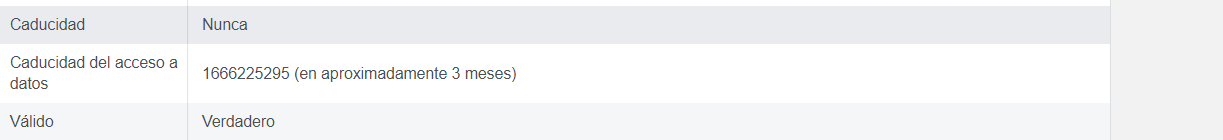

### Tutorial: 

- https://www.daniloaz.com/es/como-obtener-un-token-o-identificador-de-acceso-permanente-a-una-pagina-de-facebook/